In [2]:
#Setup
# data manipulation
import pandas as pd
import numpy as np

# data viz
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

# apply styling for data visualization
plt.style.use("ggplot")
rcParams['figure.figsize'] = (12, 6)

# use sklearn to import a dataset
from sklearn.datasets import load_wine

In [4]:
# load the dataset
wine = load_wine()

# convert the dataset to a pandas dataframe
df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
# create target column
df["target"] = wine.target

#see the statistical value (central tendency) and info from the dataset
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [5]:
#checking for duplicates
duplicate = df.duplicated().sum()
print(duplicate)

0


In [6]:
#change the colum name 
df.rename(columns={"od280/od315_of_diluted_wines": "protein_concentration"}, inplace=True)

In [7]:
#count the quantity of each item in dataset
count = df.target.value_counts()
print(count)

1    71
0    59
2    48
Name: target, dtype: int64


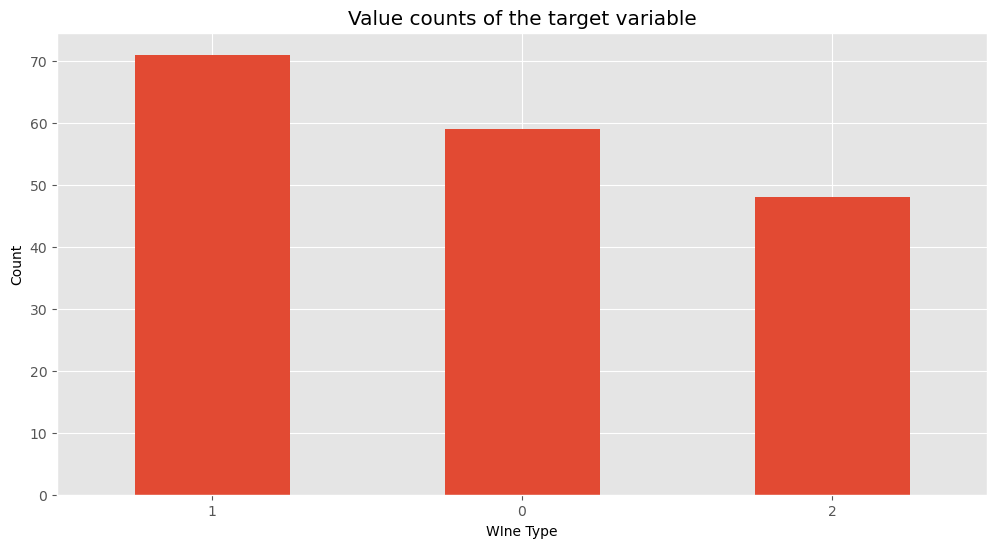

In [8]:
#visualize the count
df.target.value_counts().plot(kind='bar')
plt.title("Value counts of the target variable")
plt.xlabel("WIne Type")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.show()

In [9]:
#Numerical values
mags = df.magnesium.describe()
print(mags)

count    178.000000
mean      99.741573
std       14.282484
min       70.000000
25%       88.000000
50%       98.000000
75%      107.000000
max      162.000000
Name: magnesium, dtype: float64


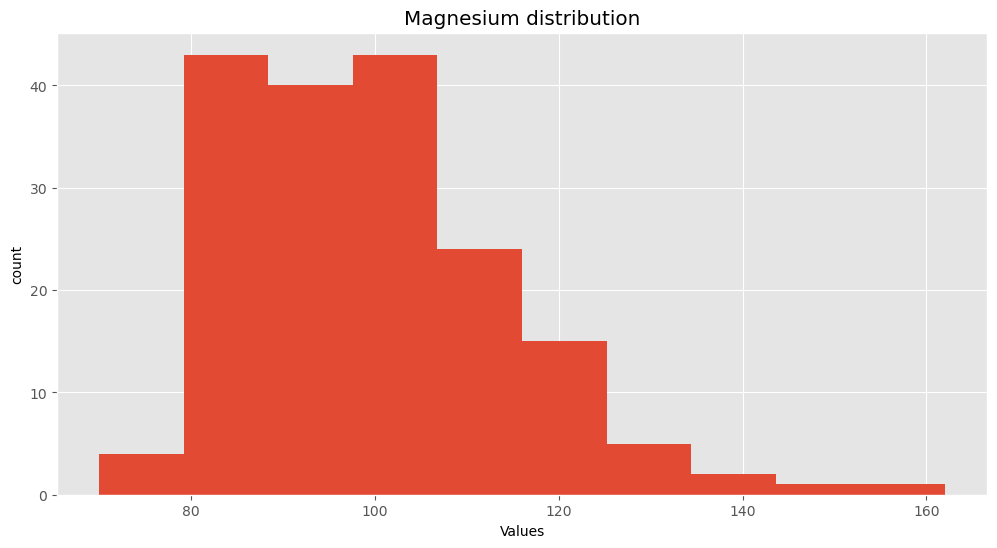

In [10]:
#plot the histogram
df.magnesium.hist()
plt.title("Magnesium distribution")
plt.xlabel('Values')
plt.ylabel('count')
plt.show()

In [11]:
#evaluate the distribution skewness and kurtosis
print(f"Skewness: {df['magnesium'].skew()}")
print(f"Kurtosis: {df['magnesium'].kurt()}")

Skewness: 1.098191054755161
Kurtosis: 2.1049913235905557


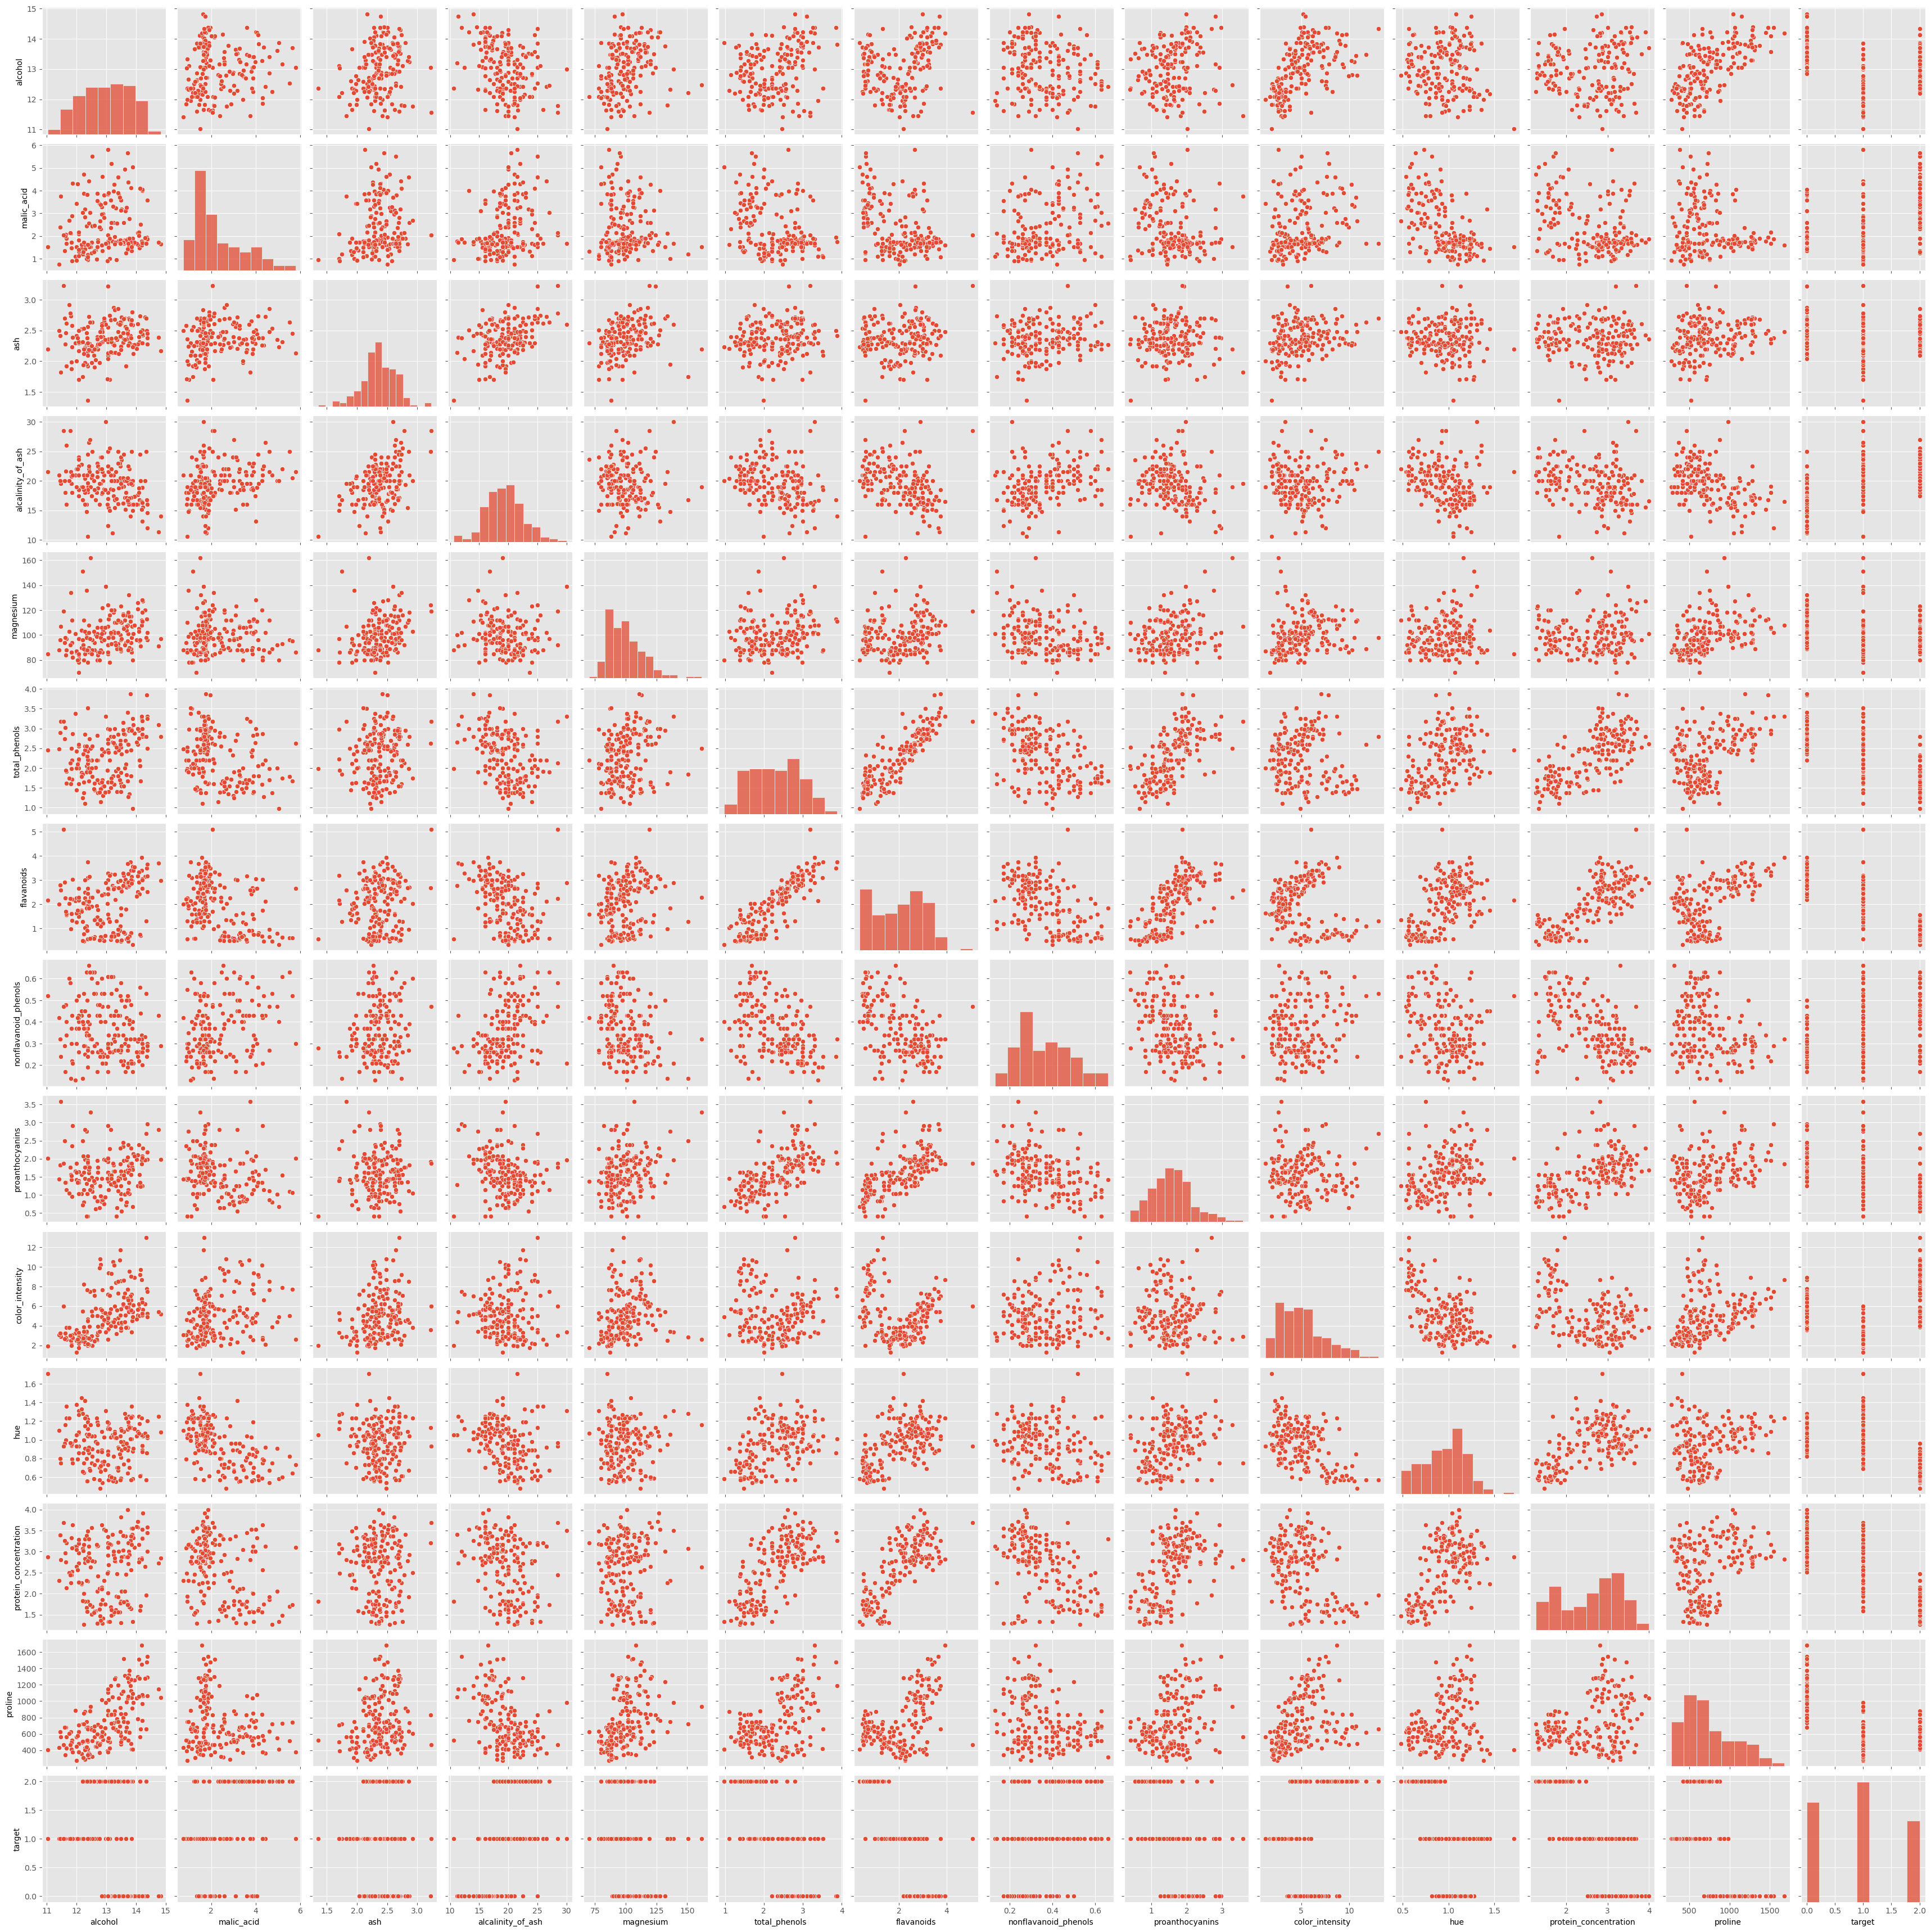

In [12]:
#study the relationships between variable 
sns.pairplot(df)

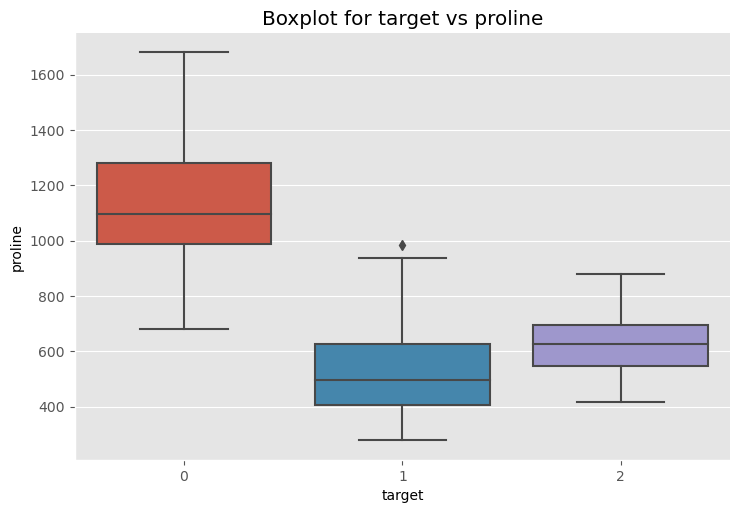

In [13]:
#create boxplot for target vs flavanoids and proline
sns.catplot(x="target", y="proline", data=df, kind="box", aspect=1.5)
plt.title("Boxplot for target vs proline")
plt.show()

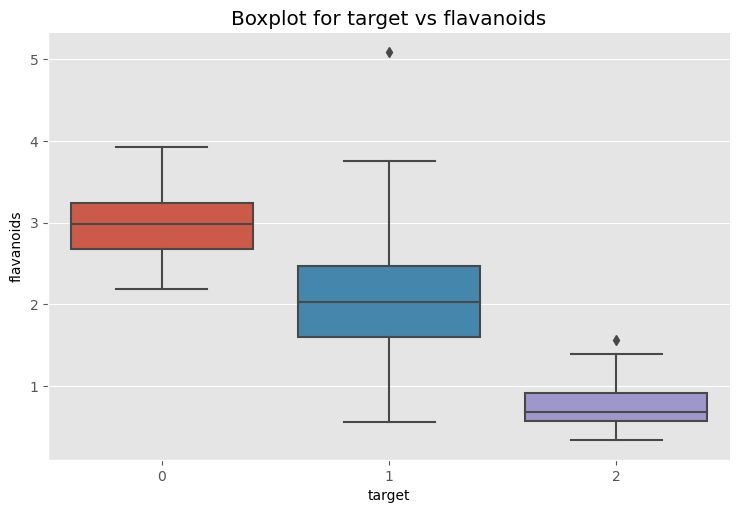

In [14]:
sns.catplot(x='target', y='flavanoids', data=df, kind='box', aspect=1.5)
plt.title("Boxplot for target vs flavanoids")
plt.show()

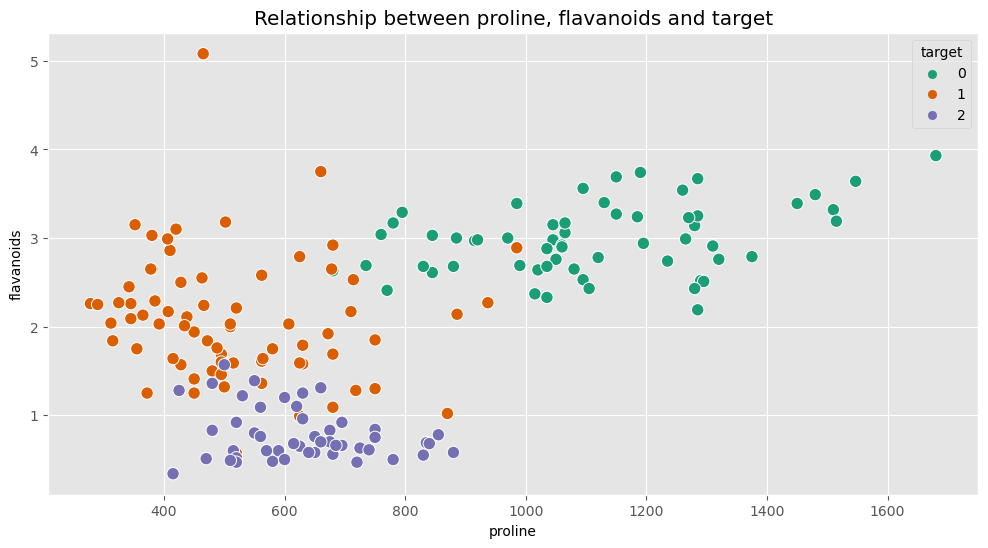

In [15]:
#create scatterplot
sns.scatterplot(x="proline", y="flavanoids", hue="target", data=df, palette="Dark2", s=80)
plt.title("Relationship between proline, flavanoids and target")
plt.show()

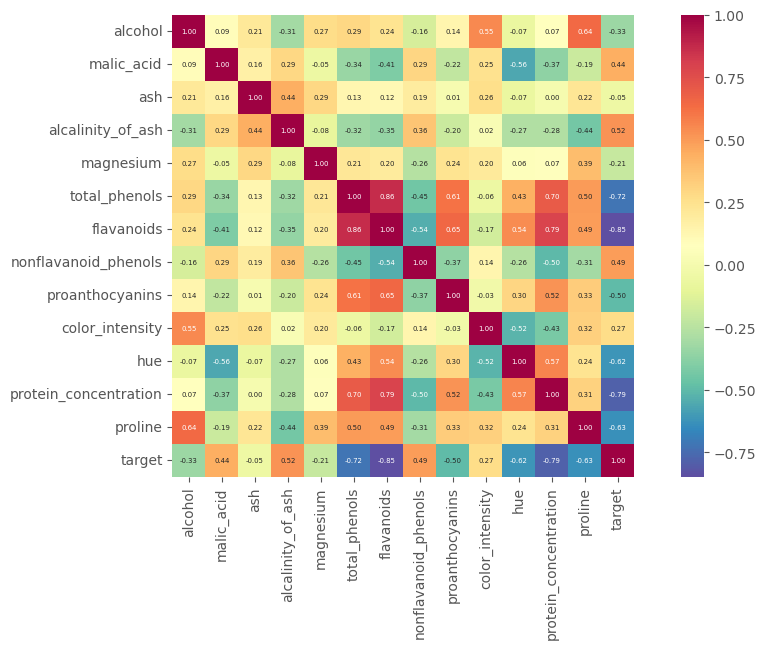

In [16]:
#create heatmap of correlation matrix
corrmat = df.corr()
hm = sns.heatmap(corrmat, 
                 cbar=True, 
                 annot=True, 
                 square=True, 
                 fmt='.2f', 
                 annot_kws={'size': 5}, 
                 yticklabels=df.columns, 
                 xticklabels=df.columns, 
                 cmap="Spectral_r")
plt.show()